<a href="https://colab.research.google.com/github/ishan4421/Tesla-Stock-PySpark-/blob/main/Tesla_stock_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [26]:
from pyspark.sql.functions import col, to_date

In [29]:
from pyspark.sql.functions import month, year

In [55]:
from pyspark.sql.functions import dayofweek, weekofyear

In [11]:
import pandas as pd

In [5]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=12d92e3d80a6deadeaed3febb758f545704d7c103a6bc818db0b9bed2395637f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [6]:
from pyspark.sql import functions

In [7]:
from pyspark.sql import SparkSession

In [2]:
tesla= files.upload()

Saving Tesla Dataset.csv to Tesla Dataset.csv


{'Tesla Dataset.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500\n2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500\n2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000\n2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000\n2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500\n2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500\n2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000\n2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000\n2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500\n2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500\n2010-07-14,1.196000,1.343333,1.184000,1.322667,1.322667,62928000\n2010-07-15,1.329333,1.433333,1.266667,1.326000,1.326000,56097000\n2010-07-16,1.380000,1.420000,1.336667,1.376000,1.376000,39319500\n2010-07-19,1.424667,1.483333,1.394667,1.460667,1.460667,37297500\n201

In [8]:
spark= SparkSession.builder.appName('Tesla').getOrCreate()

In [18]:
df=pd.read_csv('Tesla Dataset.csv')

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600
3505,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
3506,2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
3507,2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57614800


In [21]:
#creating sparkdataframe
df_spark= spark.createDataFrame(df)

In [22]:
df_spark.show()

+----------+--------+--------+--------+--------+---------+---------+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+----------+--------+--------+--------+--------+---------+---------+
|2010-06-29|1.266667|1.666667|1.169333|1.592667| 1.592667|281494500|
|2010-06-30|1.719333|   2.028|1.553333|1.588667| 1.588667|257806500|
|2010-07-01|1.666667|   1.728|1.351333|   1.464|    1.464|123282000|
|2010-07-02|1.533333|    1.54|1.247333|    1.28|     1.28| 77097000|
|2010-07-06|1.333333|1.333333|1.055333|   1.074|    1.074|103003500|
|2010-07-07|1.093333|1.108667|0.998667|1.053333| 1.053333|103825500|
|2010-07-08|   1.076|   1.168|   1.038|   1.164|    1.164|115671000|
|2010-07-09|   1.172|1.193333|1.103333|    1.16|     1.16| 60759000|
|2010-07-12|1.196667|1.204667|1.133333|1.136667| 1.136667| 33037500|
|2010-07-13|1.159333|1.242667|1.126667|1.209333| 1.209333| 40201500|
|2010-07-14|   1.196|1.343333|   1.184|1.322667| 1.322667| 62928000|
|2010-07-15|1.329333|1.433333|1.26

In [23]:
##good till now!!!!

In [25]:
#lets see schema
df_spark.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [27]:
df_spark= df_spark.withColumn('Date', to_date(col('Date')))

In [28]:
df_spark.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [33]:
#extracting the year and month for future analysis

In [30]:
df_spark= df_spark.withColumn('month', month(col('Date')))
df_spark= df_spark.withColumn('year', year(col('Date')))

In [31]:
df_spark.show()

+----------+--------+--------+--------+--------+---------+---------+-----+----+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|month|year|
+----------+--------+--------+--------+--------+---------+---------+-----+----+
|2010-06-29|1.266667|1.666667|1.169333|1.592667| 1.592667|281494500|    6|2010|
|2010-06-30|1.719333|   2.028|1.553333|1.588667| 1.588667|257806500|    6|2010|
|2010-07-01|1.666667|   1.728|1.351333|   1.464|    1.464|123282000|    7|2010|
|2010-07-02|1.533333|    1.54|1.247333|    1.28|     1.28| 77097000|    7|2010|
|2010-07-06|1.333333|1.333333|1.055333|   1.074|    1.074|103003500|    7|2010|
|2010-07-07|1.093333|1.108667|0.998667|1.053333| 1.053333|103825500|    7|2010|
|2010-07-08|   1.076|   1.168|   1.038|   1.164|    1.164|115671000|    7|2010|
|2010-07-09|   1.172|1.193333|1.103333|    1.16|     1.16| 60759000|    7|2010|
|2010-07-12|1.196667|1.204667|1.133333|1.136667| 1.136667| 33037500|    7|2010|
|2010-07-13|1.159333|1.242667|1.126667|1

In [32]:
df_spark.count()

3509

In [40]:
#now i want to know month and year wise mean of numbers

In [50]:
df_grouped_spark=df_spark.groupby('year','month').mean().sort('year','month')

In [51]:
df_grouped_spark.write.csv('year_month_mean_analysis.csv')


In [52]:
#till now after sorting. i have written it in csv file..alternatively, we can sent it in AWS S3 bucket using Boto3 SDK, and wherever we want

In [53]:
df_spark.show()

+----------+--------+--------+--------+--------+---------+---------+-----+----+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|month|year|
+----------+--------+--------+--------+--------+---------+---------+-----+----+
|2010-06-29|1.266667|1.666667|1.169333|1.592667| 1.592667|281494500|    6|2010|
|2010-06-30|1.719333|   2.028|1.553333|1.588667| 1.588667|257806500|    6|2010|
|2010-07-01|1.666667|   1.728|1.351333|   1.464|    1.464|123282000|    7|2010|
|2010-07-02|1.533333|    1.54|1.247333|    1.28|     1.28| 77097000|    7|2010|
|2010-07-06|1.333333|1.333333|1.055333|   1.074|    1.074|103003500|    7|2010|
|2010-07-07|1.093333|1.108667|0.998667|1.053333| 1.053333|103825500|    7|2010|
|2010-07-08|   1.076|   1.168|   1.038|   1.164|    1.164|115671000|    7|2010|
|2010-07-09|   1.172|1.193333|1.103333|    1.16|     1.16| 60759000|    7|2010|
|2010-07-12|1.196667|1.204667|1.133333|1.136667| 1.136667| 33037500|    7|2010|
|2010-07-13|1.159333|1.242667|1.126667|1

In [56]:
#now i want to extract dayofweek and weeknumber of year from date

In [57]:
df_spark= df_spark.withColumn('dayofweek', dayofweek(col('Date')))
df_spark= df_spark.withColumn('weekofyear', weekofyear(col('Date')))

In [58]:
df_spark.show()

+----------+--------+--------+--------+--------+---------+---------+-----+----+---------+----------+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|month|year|dayofweek|weekofyear|
+----------+--------+--------+--------+--------+---------+---------+-----+----+---------+----------+
|2010-06-29|1.266667|1.666667|1.169333|1.592667| 1.592667|281494500|    6|2010|        3|        26|
|2010-06-30|1.719333|   2.028|1.553333|1.588667| 1.588667|257806500|    6|2010|        4|        26|
|2010-07-01|1.666667|   1.728|1.351333|   1.464|    1.464|123282000|    7|2010|        5|        26|
|2010-07-02|1.533333|    1.54|1.247333|    1.28|     1.28| 77097000|    7|2010|        6|        26|
|2010-07-06|1.333333|1.333333|1.055333|   1.074|    1.074|103003500|    7|2010|        3|        27|
|2010-07-07|1.093333|1.108667|0.998667|1.053333| 1.053333|103825500|    7|2010|        4|        27|
|2010-07-08|   1.076|   1.168|   1.038|   1.164|    1.164|115671000|    7|2010|        5|  

In [59]:
#after extracting all these, we can run aggregation and upload to desired location

In [64]:
df_pandas= df_spark.toPandas()

In [65]:
df_pandas

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,dayofweek,weekofyear
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,6,2010,3,26
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,6,2010,4,26
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,7,2010,5,26
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,7,2010,6,26
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,7,2010,3,27
...,...,...,...,...,...,...,...,...,...,...,...
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600,5,2024,6,22
3505,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900,6,2024,2,23
3506,2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300,6,2024,3,23
3507,2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57614800,6,2024,4,23


In [73]:
df_pandas_mean=df_pandas.groupby(['year','weekofyear'])[df_pandas.columns[1:5]].mean()

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
df_pandas_mean

Open        High         Low       Close
year weekofyear                                                
2010 26            1.546500    1.740667    1.330333    1.481334
     27            1.168667    1.200833    1.048833    1.112833
     28            1.252267    1.328800    1.209467    1.274133
     29            1.407600    1.437467    1.358667    1.396267
     30            1.385733    1.398667    1.341600    1.366800
...                     ...         ...         ...         ...
2024 19          177.169998  179.111997  173.773996  175.545999
     20          174.410001  178.061999  172.072000  175.146002
     21          178.512000  182.082001  174.667999  178.928003
     22          176.917499  179.847500  174.072502  177.452499
     23          175.670002  178.367496  173.337502  175.375000

[728 rows x 4 columns]

<Figure size 2000x500 with 0 Axes>

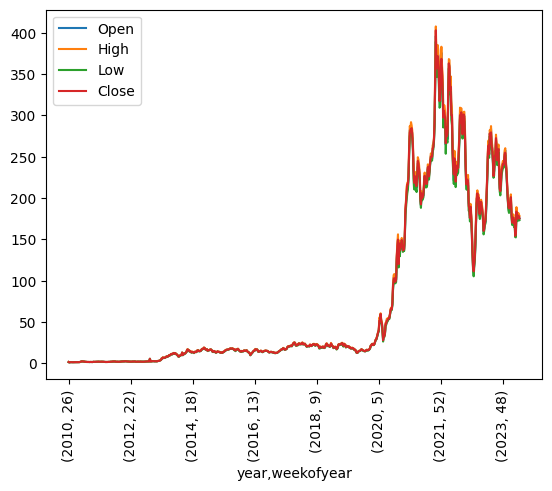

In [80]:
plt.figure(figsize=(20,5))
df_pandas_mean.plot()
plt.xticks(rotation=90)
plt.show()


In [81]:
#better visualisations can be made.....